In [ ]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Balanced Custom Dataset with True Labels
data = {
    "comment": [
        # Positive Comments
        "I absolutely love this product! It's just perfect. 😍🔥",
        "Incredible! Works better than I expected. 5 stars! 🌟🌟🌟🌟🌟",
        "This is fantastic! I couldn’t be happier with my purchase. 🎉",
        "Superb quality! Worth every penny. 💯",
        "I'm so happy with this, totally exceeded my expectations!",

        # Neutral Comments (More variety, factual, non-emotional)
        "It's fine, does what it says. Nothing special though.",
        "A decent product. Not bad, not great—just okay.",
        "The shipping was on time. No issues, but nothing exciting either.",
        "As described. It works as expected, no surprises.",
        "I don’t have strong feelings about this. It’s just okay.",
        "The product arrived in a box, well-packaged.",
        "This is a standard product, similar to others on the market.",
        "I used it once, and it functioned as expected.",
        "Customer support responded, but it took a while.",
        "It’s neither good nor bad, just another product.",

        # Negative Comments
        "This is absolutely terrible. I wish I never bought it. 😡",
        "Horrible experience! I regret this purchase completely. 😞",
        "Extremely disappointed! What a waste of money. 💸",
        "Not what I expected. Poor quality and unreliable!",
        "Wouldn’t recommend this at all. Stay away!",
        "This was a complete letdown. False advertising!",
        "It broke within a week. What a disaster!",
        "Not worth the price. I feel scammed.",
        "The worst customer service I’ve ever dealt with.",
        "Terrible experience, I wouldn’t wish this on anyone."
    ],
    "true_sentiment": [
        "Positive", "Positive", "Positive", "Positive", "Positive",
        "Neutral", "Neutral", "Neutral", "Neutral", "Neutral",
        "Neutral", "Neutral", "Neutral", "Neutral", "Neutral",
        "Negative", "Negative", "Negative", "Negative", "Negative",
        "Negative", "Negative", "Negative", "Negative", "Negative"
    ]  # Balanced Labels
}


df = pd.DataFrame(data)



In [ ]:
# %%
df = pd.DataFrame(data)

# Step 2: Preprocess the Data
nltk.download("stopwords")
nltk.download("punkt")
# Download the 'punkt_tab' data for sentence tokenization
nltk.download('punkt_tab')

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text_tokens = word_tokenize(text)
    filtered_text = " ".join([word for word in text_tokens if word not in stopwords.words("english")])
    return filtered_text if filtered_text else "neutral"  # Avoid empty text

df["cleaned_text"] = df["comment"].apply(clean_text)

# Step 3: Sentiment Analysis with VADER
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["cleaned_text"].apply(lambda x: sia.polarity_scores(x)["compound"])
# %%

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["vader_sentiment"] = df["sentiment_score"].apply(categorize_sentiment)



In [ ]:
# Step 4: Sentiment Analysis with BERT
bert_model = pipeline("sentiment-analysis")  # Load BERT model
df["bert_sentiment"] = df["cleaned_text"].apply(lambda x: bert_model(x)[0]["label"].upper())  # Convert to UPPERCASE

df["true_sentiment"] = df["true_sentiment"].str.upper()  # Ensure true labels match format

# Step 5: Model Evaluation
print("\n\U0001F4A1 VADER Sentiment Analysis Accuracy:", accuracy_score(df["true_sentiment"], df["vader_sentiment"]))
print(classification_report(df["true_sentiment"], df["vader_sentiment"]))

print("\n\U0001F4A1 BERT Sentiment Analysis Accuracy:", accuracy_score(df["true_sentiment"], df["bert_sentiment"]))
print(classification_report(df["true_sentiment"], df["bert_sentiment"]))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



💡 VADER Sentiment Analysis Accuracy: 0.0
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00      10.0
     NEUTRAL       0.00      0.00      0.00      10.0
    Negative       0.00      0.00      0.00       0.0
     Neutral       0.00      0.00      0.00       0.0
    POSITIVE       0.00      0.00      0.00       5.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00      25.0
   macro avg       0.00      0.00      0.00      25.0
weighted avg       0.00      0.00      0.00      25.0


💡 BERT Sentiment Analysis Accuracy: 0.6
              precision    recall  f1-score   support

    NEGATIVE       0.62      1.00      0.77        10
     NEUTRAL       0.00      0.00      0.00        10
    POSITIVE       0.56      1.00      0.71         5

    accuracy                           0.60        25
   macro avg       0.39      0.67      0.49        25
weighted avg       0.36      0.60      0.45     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

<ipython-input-15-e4720176f038>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["vader_sentiment"], palette="coolwarm")


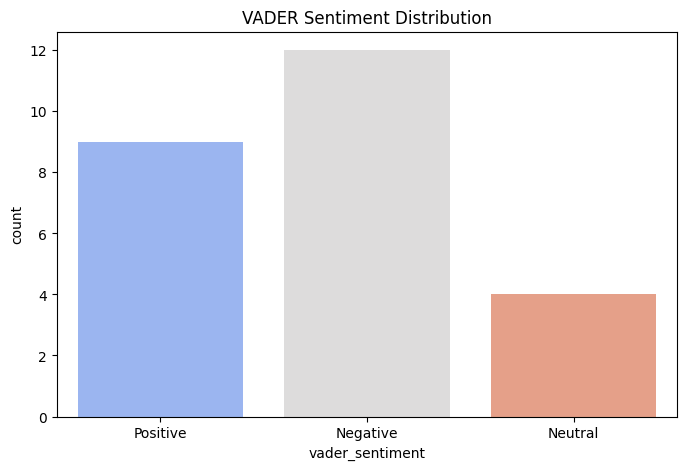

<ipython-input-15-e4720176f038>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["bert_sentiment"], palette="viridis")


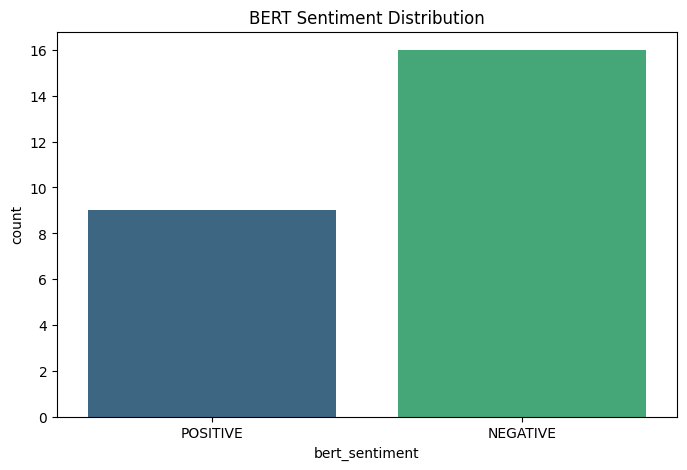

In [ ]:
# Step 6: Visualizing Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["vader_sentiment"], palette="coolwarm")
plt.title("VADER Sentiment Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=df["bert_sentiment"], palette="viridis")
plt.title("BERT Sentiment Distribution")
plt.show()